In [73]:
# Basic data analysis for protein proteomics

# First, import things

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from venny4py.venny4py import venny4py

import numpy as np
from sklearn.decomposition import PCA, NMF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, normalize
from math import log10, log2, ceil, floor, sqrt, log, e
from missforest import MissForest
import os

from functions import *

from helpers import general_helpers as gh
from helpers import stats_helpers as sh
from helpers import proteomics_helpers as ph
from helpers import mpl_plotting_helpers as mph

In [74]:
ptm_cols = {"PG.Genes":"Gene Name",
            "PTM.ModificationTitle" : "Modification Type",
            "PTM.SiteAA" : "Amino acid",
            "PTM.SiteLocation" : "Site",
            "PTM.FlankingRegion" : "Flanking sequence",
             '01_0m_Waters_R1_sSH2_021725_103611.raw.PTM.Label-Free Quant' : "Waters 0m R1",
             '02_0m_Waters_R2_sSH2_021725_125405.raw.PTM.Label-Free Quant' : "Waters 0m R2",
             '03_0m_Waters_R3_sSH2_021725_151157.raw.PTM.Label-Free Quant' : "Waters 0m R3",
             '04_0m_Waters_R4_sSH2_021725_172915.raw.PTM.Label-Free Quant' : "Waters 0m R4",
             '06_2m_Waters_R1_sSH2_021725_213844.raw.PTM.Label-Free Quant' : "Waters 2m R1",
             '07_2m_Waters_R2_sSH2_021725_235720.raw.PTM.Label-Free Quant' : "Waters 2m R2",
             '08_2m_Waters_R3_sSH2_021825_021612.raw.PTM.Label-Free Quant' : "Waters 2m R3",
             '09_2m_Waters_R4_sSH2_021825_043348.raw.PTM.Label-Free Quant' : "Waters 2m R4",
             '11_0m_Thermo_R1_sSH2_021825_084238.raw.PTM.Label-Free Quant' : "Thermo 0m R1",
             '12_0m_Thermo_R2_sSH2_021825_112430.raw.PTM.Label-Free Quant' : "Thermo 0m R2",
             '13_0m_Thermo_R3_sSH2_021825_134217.raw.PTM.Label-Free Quant' : "Thermo 0m R3",
             '14_0m_Thermo_R4_sSH2_021825_160027.raw.PTM.Label-Free Quant' : "Thermo 0m R4",
             '16_2m_Thermo_R1_sSH2_021825_201012.raw.PTM.Label-Free Quant' : "Thermo 2m R1",
             '17_2m_Thermo_R2_sSH2_021825_222835.raw.PTM.Label-Free Quant' : "Thermo 2m R2",
             '18_2m_Thermo_R3_sSH2_021925_004649.raw.PTM.Label-Free Quant' : "Thermo 2m R3",
             '19_2m_Thermo_R4_sSH2_021925_030422.raw.PTM.Label-Free Quant' : "Thermo 2m R4",
             '21_0m_TECAN_R1_sSH2_021925_071305.raw.PTM.Label-Free Quant' : "TECAN 0m R1",
             '22_0m_TECAN_R2_sSH2_021925_093037.raw.PTM.Label-Free Quant' : "TECAN 0m R2",
             '23_0m_TECAN_R3_sSH2_021925_114900.raw.PTM.Label-Free Quant' : "TECAN 0m R3",
             '24_0m_TECAN_R4_sSH2_021925_140639.raw.PTM.Label-Free Quant' : "TECAN 0m R4",
             '26_2m_TECAN_R1_sSH2_021925_181659.raw.PTM.Label-Free Quant' : "TECAN 2m R1",
             '27_2m_TECAN_R2_sSH2_021925_203504.raw.PTM.Label-Free Quant' : "TECAN 2m R2",
             '28_2m_TECAN_R3_sSH2_021925_225228.raw.PTM.Label-Free Quant' : "TECAN 2m R3",
             '29_2m_TECAN_R4_sSH2_022025_011034.raw.PTM.Label-Free Quant' : "TECAN 2m R4",
             '31_0m_ProtiFi_R1_sSH2_022025_051949.raw.PTM.Label-Free Quant' : "ProtiFi 0m R1",
             '32_0m_ProtiFi_R2_sSH2_022025_073707.raw.PTM.Label-Free Quant' : "ProtiFi 0m R2",
             '33_0m_ProtiFi_R3_sSH2_022025_095447.raw.PTM.Label-Free Quant' : "ProtiFi 0m R3",
             '34_0m_ProtiFi_R4_sSH2_022025_121303.raw.PTM.Label-Free Quant' : "ProtiFi 0m R4",
             '36_2m_ProtiFi_R1_sSH2_022025_162403.raw.PTM.Label-Free Quant' : "ProtiFi 2m R1",
             '37_2m_ProtiFi_R2_sSH2_022025_184130.raw.PTM.Label-Free Quant' : "ProtiFi 2m R2",
             '38_2m_ProtiFi_R3_sSH2_022025_205945.raw.PTM.Label-Free Quant' : "ProtiFi 2m R3",
             '39_2m_ProtiFi_R4_sSH2_022025_231759.raw.PTM.Label-Free Quant' : "ProtiFi 2m R4"}

pep_cols = {"PEP.StrippedSequence":"Sequence",
             '01_0m_Waters_R1_sSH2_021725_103611.raw.PEP.Label-Free Quant' : "Waters 0m R1",
             '02_0m_Waters_R2_sSH2_021725_125405.raw.PEP.Label-Free Quant' : "Waters 0m R2",
             '03_0m_Waters_R3_sSH2_021725_151157.raw.PEP.Label-Free Quant' : "Waters 0m R3",
             '04_0m_Waters_R4_sSH2_021725_172915.raw.PEP.Label-Free Quant' : "Waters 0m R4",
             '06_2m_Waters_R1_sSH2_021725_213844.raw.PEP.Label-Free Quant' : "Waters 2m R1",
             '07_2m_Waters_R2_sSH2_021725_235720.raw.PEP.Label-Free Quant' : "Waters 2m R2",
             '08_2m_Waters_R3_sSH2_021825_021612.raw.PEP.Label-Free Quant' : "Waters 2m R3",
             '09_2m_Waters_R4_sSH2_021825_043348.raw.PEP.Label-Free Quant' : "Waters 2m R4",
             '11_0m_Thermo_R1_sSH2_021825_084238.raw.PEP.Label-Free Quant' : "Thermo 0m R1",
             '12_0m_Thermo_R2_sSH2_021825_112430.raw.PEP.Label-Free Quant' : "Thermo 0m R2",
             '13_0m_Thermo_R3_sSH2_021825_134217.raw.PEP.Label-Free Quant' : "Thermo 0m R3",
             '14_0m_Thermo_R4_sSH2_021825_160027.raw.PEP.Label-Free Quant' : "Thermo 0m R4",
             '16_2m_Thermo_R1_sSH2_021825_201012.raw.PEP.Label-Free Quant' : "Thermo 2m R1",
             '17_2m_Thermo_R2_sSH2_021825_222835.raw.PEP.Label-Free Quant' : "Thermo 2m R2",
             '18_2m_Thermo_R3_sSH2_021925_004649.raw.PEP.Label-Free Quant' : "Thermo 2m R3",
             '19_2m_Thermo_R4_sSH2_021925_030422.raw.PEP.Label-Free Quant' : "Thermo 2m R4",
             '21_0m_TECAN_R1_sSH2_021925_071305.raw.PEP.Label-Free Quant' : "TECAN 0m R1",
             '22_0m_TECAN_R2_sSH2_021925_093037.raw.PEP.Label-Free Quant' : "TECAN 0m R2",
             '23_0m_TECAN_R3_sSH2_021925_114900.raw.PEP.Label-Free Quant' : "TECAN 0m R3",
             '24_0m_TECAN_R4_sSH2_021925_140639.raw.PEP.Label-Free Quant' : "TECAN 0m R4",
             '26_2m_TECAN_R1_sSH2_021925_181659.raw.PEP.Label-Free Quant' : "TECAN 2m R1",
             '27_2m_TECAN_R2_sSH2_021925_203504.raw.PEP.Label-Free Quant' : "TECAN 2m R2",
             '28_2m_TECAN_R3_sSH2_021925_225228.raw.PEP.Label-Free Quant' : "TECAN 2m R3",
             '29_2m_TECAN_R4_sSH2_022025_011034.raw.PEP.Label-Free Quant' : "TECAN 2m R4",
             '31_0m_ProtiFi_R1_sSH2_022025_051949.raw.PEP.Label-Free Quant' : "ProtiFi 0m R1",
             '32_0m_ProtiFi_R2_sSH2_022025_073707.raw.PEP.Label-Free Quant' : "ProtiFi 0m R2",
             '33_0m_ProtiFi_R3_sSH2_022025_095447.raw.PEP.Label-Free Quant' : "ProtiFi 0m R3",
             '34_0m_ProtiFi_R4_sSH2_022025_121303.raw.PEP.Label-Free Quant' : "ProtiFi 0m R4",
             '36_2m_ProtiFi_R1_sSH2_022025_162403.raw.PEP.Label-Free Quant' : "ProtiFi 2m R1",
             '37_2m_ProtiFi_R2_sSH2_022025_184130.raw.PEP.Label-Free Quant' : "ProtiFi 2m R2",
             '38_2m_ProtiFi_R3_sSH2_022025_205945.raw.PEP.Label-Free Quant' : "ProtiFi 2m R3",
             '39_2m_ProtiFi_R4_sSH2_022025_231759.raw.PEP.Label-Free Quant' : "ProtiFi 2m R4"}

colours = ["grey", "red", "green", "blue"]
pca_colours = ["grey","white",
               "red","pink",
               "green","limegreen",
               "blue","cyan"]

files = ["20250303_prepmethods_sSH2_ptm.csv",
         "20250303_prepmethods_sSH2_peptides.csv"]

newheads = ["Missing values", "median intensity", "tex formatted site",
           "log2(Waters 0m R1)", "log2(Waters 0m R2)", "log2(Waters 0m R3)", "log2(Waters 0m R4)", 
            "log2(Waters 2m R1)", "log2(Waters 2m R2)", "log2(Waters 2m R3)", "log2(Waters 2m R4)", 
             "log2(Thermo 0m R1)", "log2(Thermo 0m R2)", "log2(Thermo 0m R3)", "log2(Thermo 0m R4)", 
            "log2(Thermo 2m R1)", "log2(Thermo 2m R2)", "log2(Thermo 2m R3)", "log2(Thermo 2m R4)",
             "log2(TECAN 0m R1)", "log2(TECAN 0m R2)", "log2(TECAN 0m R3)", "log2(TECAN 0m R4)", 
            "log2(TECAN 2m R1)", "log2(TECAN 2m R2)", "log2(TECAN 2m R3)", "log2(TECAN 2m R4)",
             "log2(ProtiFi 0m R1)", "log2(ProtiFi 0m R2)", "log2(ProtiFi 0m R3)", "log2(ProtiFi 0m R4)", 
            "log2(ProtiFi 2m R1)", "log2(ProtiFi 2m R2)", "log2(ProtiFi 2m R3)", "log2(ProtiFi 2m R4)",
             "Waters 0m log(mean)", "Waters 2m log(mean)",
            "Thermo 0m log(mean)", "Thermo 2m log(mean)", 
            "TECAN 0m log(mean)", "TECAN 2m log(mean)", 
            "ProtiFi 0m log(mean)", "ProtiFi 2m log(mean)",
             "Waters 0m SD", "Waters 2m SD", 
            "Thermo 0m SD", "Thermo 2m SD", 
            "TECAN 0m SD", "TECAN 2m SD", 
            "ProtiFi 0m SD", "ProtiFi 2m SD",
             "Waters 0m CV%", "Waters 2m CV%",
            "Thermo 0m CV%", "Thermo 2m CV%",
            "TECAN 0m CV%", "TECAN 2m CV%",
            "ProtiFi 0m CV%", "ProtiFi 2m CV%"]

groups = ["Waters 0m", "Waters 2m",
          "Thermo 0m", "Thermo 2m", 
          "TECAN 0m", "TECAN 2m", 
          "ProtiFi 0m", "ProtiFi 2m"]

comparisons = [("Waters 2m", "Waters 0m"),
               ("Thermo 2m", "Thermo 0m"),
               ("TECAN 2m", "TECAN 0m"),
               ("ProtiFi 2m", "ProtiFi 0m")]

manufacturers = ["Waters", "Thermo", "TECAN", "ProtiFi"]

def keep_first_row(file,
                   keycol = "flank",
                   heads = 0):
    """
    has to be pre-sorted

    trying to make a more efficient keep_first, we'll see
    """
    keycol_ind = file[heads].index(keycol)
    keepers = []
    latest = None
    i=0
    for row in iter(file):
        if row[keycol_ind] != latest:
            latest = row[keycol_ind]
            keepers.append(row)
        if i % 50000 == 0:
            print(i)
        i+=1
    return keepers

def unique_ptm(file, 
               ptm_type = "Phospho (STY)",
               ptm_col = "Modification Type",
               aa = "Amino acid",
               site = "Site",
               gene = "Gene Name",
               flank = "Flanking sequence",
               ptm_aas = ["Y"]):
    # First, get the column indices from the names
    ptm_loc = file[0].index(ptm_col)
    aa_loc = file[0].index(aa)
    site_loc = file[0].index(site)
    gene_loc = file[0].index(gene)
    flank_loc = file[0].index(flank)
    # Filter for only the PTM of interest
    file = [file[0]] + [row for row in file if row[ptm_loc] == ptm_type]
    # Make a string for the site
    file = [file[0] + ["Site String"]] + [row + [f"{row[gene_loc]}$^{{{row[aa_loc]}{int(row[site_loc])}}}$"] for row in file[1:]]
    # Filter for unique flanking sequences
    file = [file[0]] + sorted(file[1:], key = lambda x: x[flank_loc])
    file = keep_first_row(file, keycol = flank, heads = 0)
    # Keep only tyrosine phosphorylated stuff
    file = [file[0]] + [row for row in file if row[aa_loc] in ptm_aas]
    # Return the file
    return file

def grab_sample_counts(file,
                       group_sample_inds):
    # First, transpose the file, assume it has headers
    file_t = gh.transpose(*file[1:])
    # Then, use the group indices to make some sums
    counts = [[key, [sum([1 for _ in file_t[j] if _ == _]) for j in value]]
              for key, value in group_sample_inds.items()]
    return counts

def split_and_impute(file,
                     glob_groups,
                     header_row):
    # First, bin the columns into dicts with the global groups
    group_inds = [[i for i in range(len(header_row)) if g in header_row[i]]
                  for g in glob_groups]
    group_inds = [[0] + row for row in group_inds]
    file_d = {glob_groups[i] : gh.transpose(*[file[j] for j in group_inds[i]]) for i in range(len(glob_groups))}
    file_d = {key : [row for row in value if any([True for _ in row[1:] if _ == _])] for key, value in file_d.items()}
    # Impute each matrix
    file_i = {key : None for key, value in file_d.items()}
    for key, value in file_d.items():
        if os.path.exists(f"tmp/{key}_imputed.csv"):
            file_i[key] = pd.read_csv(f"tmp/{key}_imputed.csv").transpose().iloc[1:]
        else:
            data = pd.DataFrame([row[1:] for row in value], 
                                index = gh.transpose(*value)[0]).transpose()
            data.to_csv(f"tmp/{key}_no_impute.csv")
            imputer = MissForest()
            imputed_data = imputer.fit_transform(data)
            imputed_data.to_csv(f"tmp/{key}_imputed.csv")
            file_i[key] = imputed_data.transpose()
    imp_data = [list(row) for row in pd.concat([value for key, value in file_i.items()], axis = 1).astype(float).sort_index().to_numpy()]
    imp_data = [gh.transform_values(row, transform = float) for row in imp_data]
    return imp_data

def _insert_nans(unpacked_total_ps, qvalues):
    # q-values come back in the order of the origianl list,
    # so we can just iterate through total ps and make a new
    # list with nans everywhere that there's a nan
    new_qs = []
    i=0
    for item in unpacked_total_ps:
        if item != item:
            new_qs.append(float("nan"))
        else:
            new_qs.append(qvalues[i])
            i+=1
    return new_qs

def perform_stats(file,
                  group_inds, 
                  comparisons,
                  logged = True,
                  pi0 = 1):
    ### Iterate through, calculate stuff, and add back into the file at the end
    # Iterate through the rows and create the fold changes
    if logged:
        fold_changes = [[sh.mean([row[x] for x in group_inds[c[0]]]) - sh.mean([row[x] for x in group_inds[c[1]]]) for row in file]
                       for c in comparisons]
    else:
        fold_changes = [[sh.mean([row[x] for x in group_inds[c[0]]])/sh.mean([row[x] for x in group_inds[c[1]]]) for row in file]
                       for c in comparisons]
    # Iterate through the rows and do the T-tests
    tests = [[sh.TTest([row[x] for x in group_inds[c[0]]],
                       [row[x] for x in group_inds[c[1]]],
                       test_type = "w",
                       threshold = 2,
                       labels = False).output[0]["pvalue"][0] for row in file] for c in comparisons]
    # Then run everything through the Storey q-value algorithm
    unpacked_ps = gh.unpack_list(tests)
    unpacked_nanless = [item for item in unpacked_ps if item == item]
    global_q = list(sh.storey(unpacked_nanless,
                              pi0 = pi0)["qvalue"].astype(float))
    # insert_nans
    global_q = _insert_nans(unpacked_ps, global_q)
    ## because of imputation, global_q should be the correct size, but we can check
    assert len(global_q) == len(fold_changes)*len(fold_changes[0]), "not enough q-values for the matrix."
    packed_qs = [global_q[len(fold_changes[0])*i:len(fold_changes[0])*(i+1)] for i in range(len(fold_changes))]
    # Pack everything together in the original matrix
    fold_changes = gh.transpose(*fold_changes)
    tests = gh.transpose(*tests)
    packed_qs = gh.transpose(*packed_qs)
    file = [file[i] + fold_changes[i] + tests[i] + packed_qs[i] for i in range(len(file))]
    sheads = gh.unpack_list([[f"{c[0]} vs {c[1]} {label}" for c in comparisons]
                            for label in ["Fold change", "pvalue", "qvalue"]])
    return file, sheads

def read_file(filename,
              rename_columns,
              group_labels,
              new_heads,
              glob_group = manufacturers,
              protein = True,
              sort_head = "Gene Name",
              ptm = False,
              stats = False,
              comparisons = None,
              comp_heads = None,
              pi0 = None,
              impute = False,
              ptm_kwargs = {"ptm_type" : "Phospho (STY)",
                            "ptm_col" : "Modification Type",
                            "aa" : "Amino acid",
                            "site" : "Site",
                            "gene" : "Gene Name",
                            "flank" : "Flanking sequence"}):
    file = pd.read_csv(filename)
    file = file.rename(columns = rename_columns)[list(rename_columns.values())]
    original_heads = list(file.columns.values)
    group_indices = {g : [i for i in range(len(file.columns)) if g in file.columns[i]]
                     for g in group_labels}
    data_range = [min(gh.unpack_list([value for key, value in group_indices.items()])), 
                  max(gh.unpack_list([value for key, value in group_indices.items()]))]
    # Then continue as normal
    log_indices = {key : [i + 3 + data_range[1]-data_range[0]+1 for i in value] for key, value in group_indices.items()}
    file = [list(row) for row in file.to_numpy()]
    file = [gh.transform_values(row, transform = float) for row in file]
    # because there are strange characters in the gene names
    file = [row for row in file if type(row[0]) == str]
    # Calculate missing values across a row
    file = [row + [sum([1 for _ in row[data_range[0]:data_range[1]+1] if _ != _])] for row in file]
    # Calculate highest median intensity
    file = [row + [sh.median(row[data_range[0]:data_range[1]+1])] for row in file]
    # Sort the file based on those two criteria and the sort column
    file = sorted(file, key = lambda x: (x[original_heads.index(sort_head)], x[-2], -x[-1]))
    if ptm:
        file = unique_ptm([original_heads + new_heads] + file, **ptm_kwargs)
    else:
        file = keep_first([original_heads + new_heads] + file, keycol = sort_head)
    # Add a function to grab the sample counts
    #             RETURN THIS
    persamp_counts = grab_sample_counts(file, 
                                        group_indices)
    # Then log stransform
    log_data = [[safe_log2(item) for item in row[data_range[0]:data_range[1]+1]]
                for row in file[1:]]
    # and split/input the logged data
    imputable_data = [[file[i+1][original_heads.index(sort_head)]]+log_data[i] for i in range(len(log_data))]
    if impute:
        log_data = split_and_impute(gh.transpose(*imputable_data), 
                                glob_group,
                                header_row = [sort_head] + [head for head in new_heads if "log2(" in head])
    assert len(log_data)+1 == len(file), "Imputed data do not have the same size as original data. Maybe the index carried over?"
    # Get rid of the heads for now
    file = [file[i+1] + log_data[i] for i in range(len(log_data))]
    file = [row + [safe_log2(sh.mean([row[i] for i in value])) for key, value in group_indices.items()]
            for row in file]
    file = [row + [sh.standard_deviation([row[i] for i in value]) 
                   for key, value in log_indices.items()] for row in file]
    file = [row + [cv_perc(sh.standard_deviation([row[i] for i in value]))
                   for key, value in log_indices.items()] for row in file]
    if stats == True and comparisons != None:
        file, sheads = perform_stats(file,
                              log_indices, 
                              comparisons,
                              logged = True,
                              pi0 = pi0)
        file = [original_heads + new_heads + sheads] + file
    else:
        file = [original_heads + new_heads[:2] + new_heads[3:]] + file
    return file, log_data, group_indices, log_indices

def make_all_pepplots(peptide_list, path = "outputs/graphics",
                      subset = ["all"], exclude = [], comparisons = [],
                      foldchange_group = None,
                      global_max = 6,
                      heatmap_kwargs = {'aspect': 'equal', 'remove_spines': False, 'subplot_args': {'figsize': (14, 1)}, 
                                        'colorbar_args': {'orientation': 'vertical', 'location': 'right', 'shrink': 2}, 
                                        'textdict': {'fontfamily': 'sans-serif', 'font': 'Arial', 'fontweight': 'bold'}, 
                                        'img_name': 'figs/pep_plots/tbc1d5/heatmaps/tbc1d5_2_foldchange_all', 
                                        'heat_title': '', 
                                        'clb_label': 'log$_{2}$(FC)',
                                        'maxs': [-6, 6], 
                                        "sig_bounds" : [0.1,0.05,0.01],
                                        'cmap': mph.trans}):
    """
    """
    if global_max == None:
        max_val = math.ceil(max([max(p.vals) for p in peptide_list]))
        min_val = math.floor(min([min(p.vals) for p in peptide_list]))
        hm_max = math.ceil(max([max(p.means) for p in peptide_list]))
        hm_min = math.floor(min([min(p.means) for p in peptide_list]))
        hm = [-max([abs(hm_min), abs(hm_max)]), max([abs(hm_min), abs(hm_max)])]
        fc_max = math.ceil(max([max(p.fc) for p in peptide_list]))
        fc_min = math.floor(min([min(p.fc) for p in peptide_list]))
        fc = [-max([abs(fc_min), abs(fc_max)]), max([abs(fc_min), abs(fc_max)])]
    else:
        fc = [-global_max, global_max]
    for p in peptide_list:
        if not os.path.exists(f"{path}/{p.gene.lower()}/heatmaps"):
            os.makedirs(f"{path}/{p.gene.lower()}/heatmaps")
        p.heatmap(d_type = "foldchange",
                  path = f"{path}/{p.gene.lower()}/heatmaps/", 
                  maxs = fc,
                  subset = subset, exclude = exclude,
                  heatmap_args = heatmap_kwargs)
        plt.close()

/tmp/ipykernel_1536/2033412119.py:269: DtypeWarning: Columns (143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(filename)


0
(array([0.01, 0.01, 0.01, 0.01, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
       0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.96, 0.96, 0.96,
       0.96]), array([0.89715042, 0.87659681, 0.82993   , 0.82944261, 0.8044981 ,
       0.78525375, 0.77544402, 0.77132327, 0.75448725, 0.75027763,
       0.75984418, 0.74421504, 0.73976965, 0.73649923, 0.72763708,
       0.72806989, 0.73023397, 0.7276061 , 0.73088373, 0.72703908,
       0.72198232, 0.70419691, 0.70060089, 0.68824623, 0.

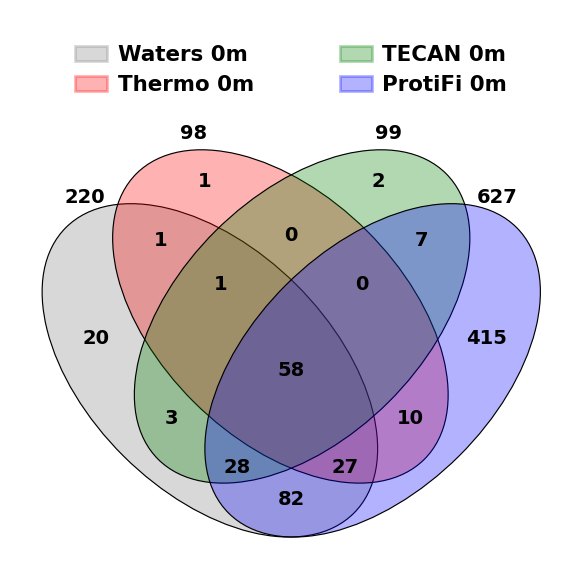

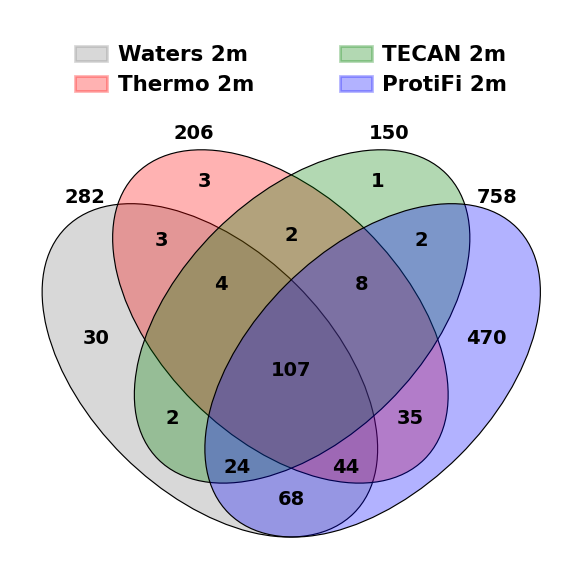

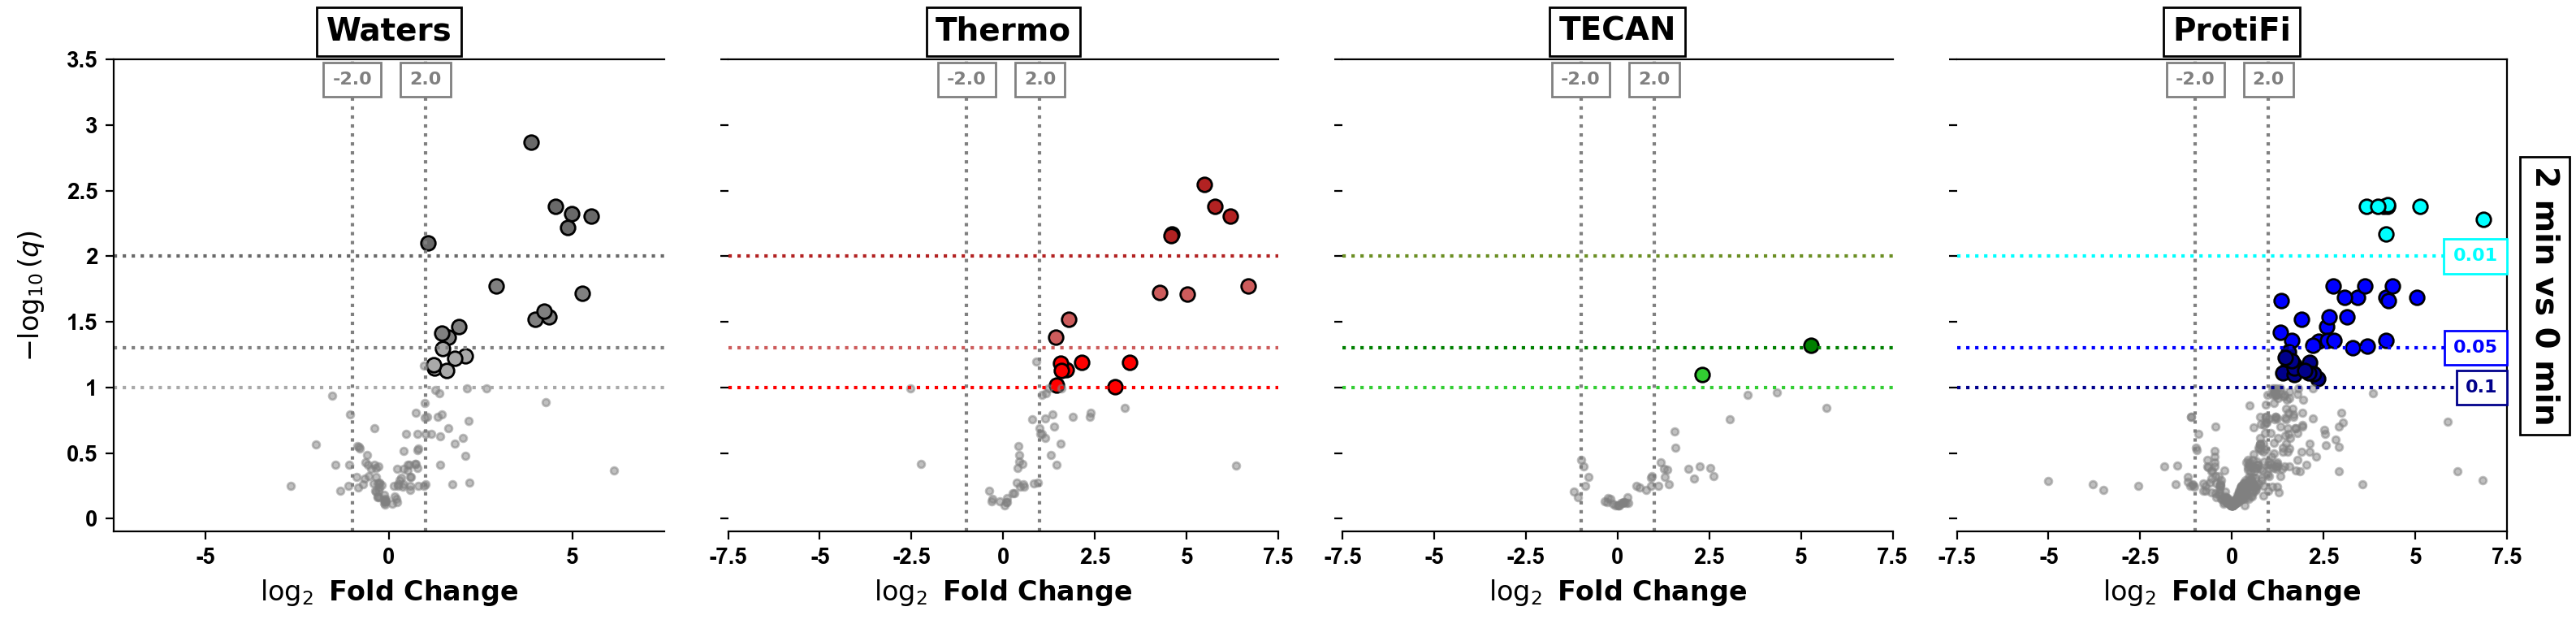

In [75]:
ptm_file, ptm_log, ptm_group_inds, ptm_log_inds = read_file(files[0],
                ptm_cols,
                groups,
                newheads,
                ptm= True,
                stats = True,
                pi0 = None,
                impute = False,
                comparisons = comparisons,
                sort_head = "Flanking sequence")


plot_counts(gh.transpose(*ptm_file), 
            "outputs/pY_ptm_0m_counts", 
            [g for g in groups if "0m" in g], 
            [value for key, value in ptm_group_inds.items() if "0m" in key],
            sample_counts =False,
            dotplot_kwargs = dict(rotation = 90, 
                                      ylabel = "pY sites",
                                      colours = colours,
                                      markersize = 20,
                                      figsize = (3,6),
                                      ymin = 0 )
           ) 
plot_counts(gh.transpose(*ptm_file), 
            "outputs/pY_ptm_2m_counts", 
            [g for g in groups if "2m" in g], 
            [value for key, value in ptm_group_inds.items() if "2m" in key],
            sample_counts =False,
            dotplot_kwargs = dict(rotation = 90, 
                                      ylabel = "pY sites",
                                      colours = colours,
                                      markersize = 20,
                                      figsize = (3,6),
                                      ymin = 0 )
           ) 

multi_reg_lineplot(pd.DataFrame(ptm_log, columns = newheads[3:35]),
                   groups = groups,
                   labels = groups,
                   log2_trans = True,
                   savefile = "outputs/pY_ptm_linreg.pdf")

ptm_0m_inds = [newheads[3:35].index(h) for h in newheads[3:35] if "0m" in h]
ptm_0m_logcols = gh.transpose(*[gh.transpose(*ptm_log)[ind] for ind in ptm_0m_inds])
ptm_0m_heads = [h for h in newheads[3:35] if "0m" in h]

pca_ax = cluster_plotting([pd.DataFrame(ptm_0m_logcols, columns =  ptm_0m_heads)], # list with minimum 1 df
                 [g for g in groups if "0m" in g],         
                 [fr"PCA Clustering, 0m pY sites"],
                 ["outputs/pY_ptm_0m_pca.pdf"],
                 [slice(4*i,4*(i+1)) for i in range(4)],
                 [g for g in groups if "0m" in g],
                 [colours],
                 markers = ["o", "^",  "s",  "d"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                          square = False,
                 pca_kwargs = dict(n_components = 5,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),)

ptm_2m_inds = [newheads[3:35].index(h) for h in newheads[3:35] if "2m" in h]
ptm_2m_logcols = gh.transpose(*[gh.transpose(*ptm_log)[ind] for ind in ptm_2m_inds])
ptm_2m_heads = [h for h in newheads[3:35] if "2m" in h]

pca_ax = cluster_plotting([pd.DataFrame(ptm_2m_logcols, columns =  ptm_2m_heads)], # list with minimum 1 df
                 [g for g in groups if "2m" in g],         
                 [fr"PCA Clustering, 0m pY sites"],
                 ["outputs/pY_ptm_2m_pca.pdf"],
                 [slice(4*i,4*(i+1)) for i in range(4)],
                 [g for g in groups if "2m" in g],
                 [colours],
                 markers = ["o", "^",  "s",  "d"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                          square = False,
                 pca_kwargs = dict(n_components = 5,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),)



hist_data = gh.transpose(*ptm_log)
hist_data = [[item for item in col if item == item] for col in hist_data]
hist_data = [hist_data[i*4:(i+1)*4] for i in range(8)]

hist_matrix(hist_data, # Assumes no headers, remove them
            groups,
            ["R1" , "R2", "R3", "R4"],
            bins = 25,
            ymax = 150,
            xlims = (10,30),
            ygroup_size = [2,2,2,2], # Should be top to bottom
            y_groups = [manufacturers[-i] for i in range(1,len(manufacturers)+1)],     # Should be top to bottom
            title = "pY Sites",
            fontdict = dict(fontfamily = "sans-serif",
                                font = "Arial",
                                fontstyle = "normal"),
            primary = ("lavender", "mediumpurple"),
            secondary = ("pink", "mediumvioletred"),
            figsize = (16,12),
            savefile = "outputs/pY_ptm_hist.pdf",
            missing = [[],[],[],[],[]])

venn_4set(gh.transpose(*ptm_file), 
          [value for key, value in ptm_group_inds.items() if "0m" in key], 
          [key for key, value in ptm_group_inds.items() if "0m" in key], 
          colours = colours,
          index_col = ptm_file[0].index("Flanking sequence"),
          filename = "outputs/pY_ptm_0m_venn.pdf")

venn_4set(gh.transpose(*ptm_file), 
          [value for key, value in ptm_group_inds.items() if "2m" in key], 
          [key for key, value in ptm_group_inds.items() if "2m" in key], 
          colours = colours,
          index_col = ptm_file[0].index("Flanking sequence"),
          filename = "outputs/pY_ptm_2m_venn.pdf")

# Get the q-values and fold-changes
qs = [col[1:] for col in gh.transpose(*ptm_file) if "qvalue" in col[0]]
fcs = [col[1:] for col in gh.transpose(*ptm_file) if "Fold change" in col[0]]

mph.volcano_array([qs], [fcs],
                  sig_cutoffs = [0.01,0.05,0.1],
                  colours = [[mph.colours["monos"][1:4],
                             mph.colours["reds"][1:4],
                             mph.colours["greens"][1:4],
                             mph.colours["blues"][1:4]]],
                  top_labels = manufacturers,
                  right_labels = ["2 min vs 0 min"],
                  left_labels = [fr"$-\log_{{10}}(q)$"],
                  bottom_labels = [fr"$\log_{{2}}$ Fold Change" for _ in range(4)],
                  fc_cutoff = 1,
                  save_arr = "outputs/pY_ptm_volcano.pdf",
                  xlim = 7.5,
                  ylim = 3.5)

file = pd.DataFrame(ptm_file[1:], columns = ptm_file[0])

ptm_peps = [ph.Peptide(list(file.iloc[i][[col for col in list(file.columns) if "log2(" in col]].astype(float)),
                    [col for col in list(file.columns) if "log2(" in col],
                    groups,
                    file.iloc[i]['Flanking sequence'],
                    statistics = list(file.iloc[i][[col for col in list(file.columns) if "qvalue" in col]].astype(float)),
                    statistics_headers =[col for col in list(file.columns) if "qvalue" in col],
                    foldchange = list(file.iloc[i][[col for col in list(file.columns) if "Fold change" in col]].astype(float)),
                    foldchange_headers = [col.split(" Fold")[0] for col in list(file.columns) if "Fold change" in col],
                    sites = str(int(file.iloc[i]['Site'])),
                    gene = file.iloc[i]["Gene Name"],
                    unique_id = file.iloc[i]["tex formatted site"],
                    colours = colours,
                    markers = ["o", "o", "s", "s",
                               "o", "o", "s", "s",
                               "o", "o", "s", "s",
                               "o", "o", "s", "s",]) for i in range(len(file))]

#make_all_pepplots(ptm_peps, 
#                  comparisons = [col for col in list(file.columns) if "qvalue" in col],
#                subset = ["all"], exclude = [], 
#                 foldchange_group = "Waters 0m",
#                  path = "figs/pep_plots")


/tmp/ipykernel_1536/2033412119.py:269: DtypeWarning: Columns (114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(filename)


	0
[['Waters 0m', [6501, 6164, 7177, 4167]], ['Thermo 0m', [10007, 12020, 11201, 14230]], ['TECAN 0m', [7673, 9887, 7541, 4032]], ['ProtiFi 0m', [16838, 17222, 15791, 26750]]]
[['Waters 2m', [8420, 4542, 4586, 9718]], ['Thermo 2m', [10912, 10977, 11305, 13945]], ['TECAN 2m', [7788, 8721, 8985, 5832]], ['ProtiFi 2m', [15245, 22103, 16241, 14608]]]
PCA
here
16
PCA
here
16
[[], [], [], [], []]


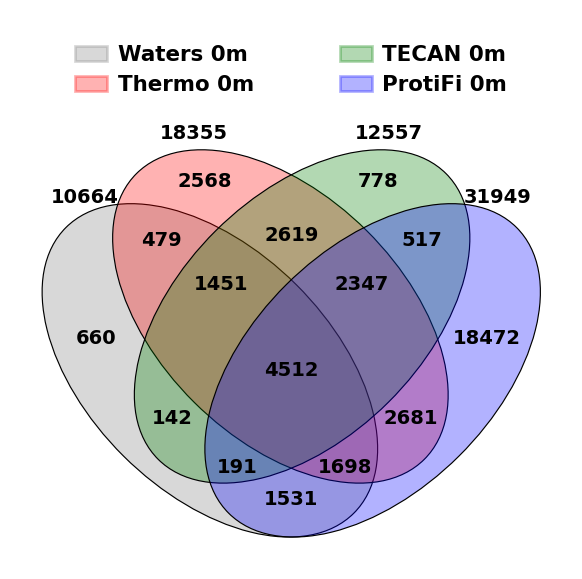

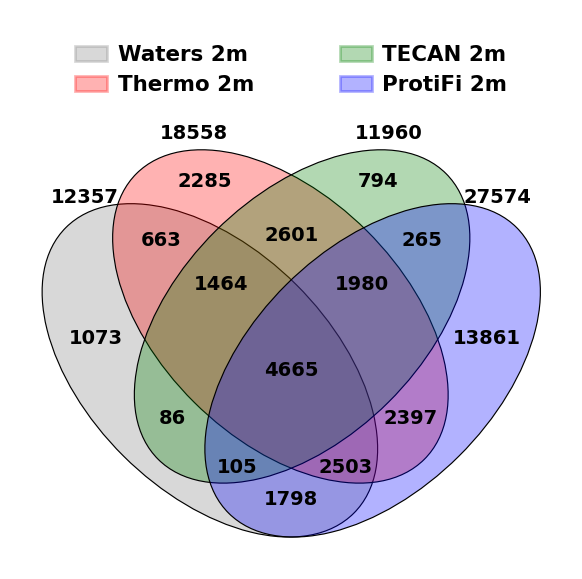

In [76]:
pep_file, pep_log, pep_group_inds, pep_log_inds = read_file(files[1],
                pep_cols,
                groups,
                newheads,
                ptm= False,
                stats = False,
                pi0 = None,
                impute = False,
                comparisons = comparisons,
                sort_head = "Sequence")


plot_counts(gh.transpose(*pep_file), 
            "outputs/pY_pep_0m_counts", 
            [g for g in groups if "0m" in g], 
            [value for key, value in pep_group_inds.items() if "0m" in key],
            sample_counts =False,
            dotplot_kwargs = dict(rotation = 90, 
                                      ylabel = "Peptides",
                                      colours = colours,
                                      markersize = 20,
                                      figsize = (3,6),
                                      ymin = 0 )
           ) 
plot_counts(gh.transpose(*pep_file), 
            "outputs/pY_pep_2m_counts", 
            [g for g in groups if "2m" in g], 
            [value for key, value in pep_group_inds.items() if "2m" in key],
            sample_counts =False,
            dotplot_kwargs = dict(rotation = 90, 
                                      ylabel = "Peptides",
                                      colours = colours,
                                      markersize = 20,
                                      figsize = (3,6),
                                      ymin = 0 )
           ) 

multi_reg_lineplot(pd.DataFrame(pep_log, columns = newheads[3:35]),
                   groups = groups,
                   labels = groups,
                   log2_trans = True,
                   savefile = "outputs/pY_pep_linreg.pdf")

pep_0m_inds = [newheads[3:35].index(h) for h in newheads[3:35] if "0m" in h]
pep_0m_logcols = gh.transpose(*[gh.transpose(*pep_log)[ind] for ind in pep_0m_inds])
pep_0m_heads = [h for h in newheads[3:35] if "0m" in h]

pca_ax = cluster_plotting([pd.DataFrame(pep_0m_logcols, columns =  pep_0m_heads)], # list with minimum 1 df
                 [g for g in groups if "0m" in g],         
                 [fr"PCA Clustering, 0m Peptides"],
                 ["outputs/pY_pep_0m_pca.pdf"],
                 [slice(4*i,4*(i+1)) for i in range(4)],
                 [g for g in groups if "0m" in g],
                 [colours],
                 markers = ["o", "^",  "s",  "d"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                          square = False,
                 pca_kwargs = dict(n_components = 5,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),)

pep_2m_inds = [newheads[3:35].index(h) for h in newheads[3:35] if "2m" in h]
pep_2m_logcols = gh.transpose(*[gh.transpose(*pep_log)[ind] for ind in pep_2m_inds])
pep_2m_heads = [h for h in newheads[3:35] if "2m" in h]

pca_ax = cluster_plotting([pd.DataFrame(pep_2m_logcols, columns =  pep_2m_heads)], # list with minimum 1 df
                 [g for g in groups if "2m" in g],         
                 [fr"PCA Clustering, 0m pY sites"],
                 ["outputs/pY_pep_2m_pca.pdf"],
                 [slice(4*i,4*(i+1)) for i in range(4)],
                 [g for g in groups if "2m" in g],
                 [colours],
                 markers = ["o", "^",  "s",  "d"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                          square = False,
                 pca_kwargs = dict(n_components = 5,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),)



hist_data = gh.transpose(*pep_log)
hist_data = [[item for item in col if item == item] for col in hist_data]
hist_data = [hist_data[i*4:(i+1)*4] for i in range(8)]

hist_matrix(hist_data, # Assumes no headers, remove them
            groups,
            ["R1" , "R2", "R3", "R4"],
            bins = 80,
            ymax = 750,
            xlims = (10,30),
            ygroup_size = [2,2,2,2], # Should be top to bottom
            y_groups = [manufacturers[-i] for i in range(1,len(manufacturers)+1)],     # Should be top to bottom
            title = "Peptides",
            fontdict = dict(fontfamily = "sans-serif",
                                font = "Arial",
                                fontstyle = "normal"),
            primary = ("lavender", "mediumpurple"),
            secondary = ("pink", "mediumvioletred"),
            figsize = (16,12),
            savefile = "outputs/pY_pep_hist.pdf",
            missing = [[],[],[],[],[]])

venn_4set(gh.transpose(*pep_file), 
          [value for key, value in pep_group_inds.items() if "0m" in key], 
          [key for key, value in pep_group_inds.items() if "0m" in key], 
          colours = colours,
          index_col = pep_file[0].index("Sequence"),
          filename = "outputs/pY_pep_0m_venn.pdf")

venn_4set(gh.transpose(*pep_file), 
          [value for key, value in pep_group_inds.items() if "2m" in key], 
          [key for key, value in pep_group_inds.items() if "2m" in key], 
          colours = colours,
          index_col = pep_file[0].index("Sequence"),
          filename = "outputs/pY_pep_2m_venn.pdf")

In [77]:

q_005_001 = [len([item for item in qcol if 0.05 > item >= 0.01]) for qcol in qs]
q_01_005 = [len([item for item in qcol if 0.1 > item >= 0.05]) for qcol in qs]
q_001 = [len([item for item in qcol if item < 0.01]) for qcol in qs]

In [78]:
print(q_01_005)
print(q_005_001)
print(q_001)

[7, 8, 1, 15]
[8, 5, 1, 22]
[6, 5, 0, 8]


###### 0.05 < 0.03 < 0.01

In [80]:
pd.DataFrame(ptm_file[1:], columns = ptm_file[0]).to_excel("outputs/Supporting Table 4 pY PTM data.xlsx")
pd.DataFrame(pep_file[1:], columns = pep_file[0]).to_excel("outputs/Supporting Table 5 pY Peptide data.xlsx")
